In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import numpy as np


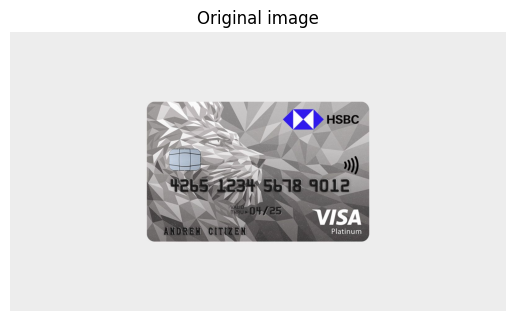

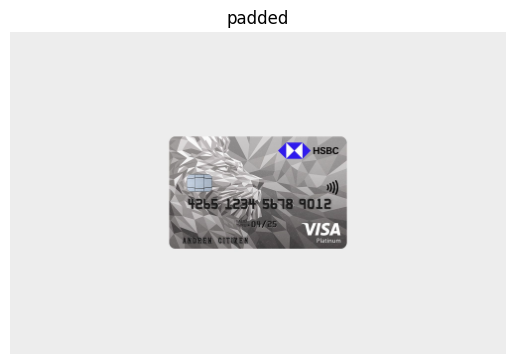

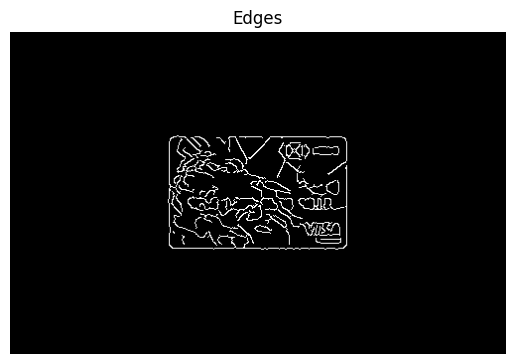

In [9]:


def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(name)
    plt.show()

def resize_image(img, target_width):

    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    height, width = img.shape[:2]  
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent))) 
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    return new_img


def resize_image_quality(img, target_width):

    if img is None:
        print("Error: Image not found or unable to load.")
        return None
    
    height, width = img.shape[:2]
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    
    return new_img


# image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
# image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')#xxxxxxxxxxxxxxxxxx
# image = cv2.imread('11 - Ya setty ew3i.jpg')
# image = cv2.imread('12 - weewooweewoo.jpg')#xxxxxxxxxxxxxxxxx
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')#blurred
# image = cv2.imread('14 - 2el noor 2ata3.jpg')#xxxxxxxxxxxxxxxxxxx
# image = cv2.imread('15 - Compresso Espresso.jpg')#xxxxxxxxxxxxxxxxxxxxxxxxxxxx
# image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')


def is_high_frequency(image):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()

    return 9000>variance > 2500


def hasSaltAndPepper(image):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return 9000<variance




if is_high_frequency(image):
    print("Image is high frequency")
    # image,_=pattern_fix_inFreqDomain(image)
    

elif hasSaltAndPepper(image):
    print("Image has salt and pepper noise")
    # image = removesaltAndPepper(image)
    

showImage("Original image",image)


image=resize_image(image,400)

#higher image quality
imagehq=resize_image_quality(image,400)

# Get the top-left pixel value
top_left_pixel = image[0, 0]

# Convert the top-left pixel to a tuple of integers
if len(image.shape) == 2:  # Grayscale image
    top_left_pixel = int(top_left_pixel)
else:  # BGR image
    top_left_pixel = tuple(map(int, top_left_pixel))
# Define the padding size
pad_size = 50 
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)

padded_imagehq = cv2.copyMakeBorder(imagehq, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

if len(padded_image.shape)==3:
    gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)
else:
    gray = padded_image


# Preprocess the image
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
blurred = cv2.convertScaleAbs(blurred)
edges = cv2.Canny(blurred, 10, 110)
showImage("Edges", edges, cmap='gray')




[((163, 218), (336, 218)), ((339, 215), (339, 135)), ((262, 106), (334, 106)), ((160, 168), (160, 111))]


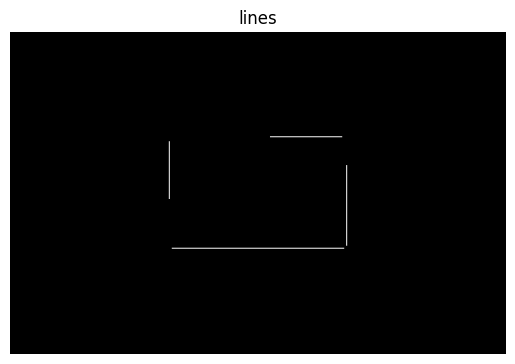

In [10]:

# Define parameters for Hough Line Transform
rho = 1# Distance resolution in pixels of the Hough grid
theta = np.pi / 186  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments


line_image = np.copy(edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

if lines is not None and len(lines)>=4:
    # Function to calculate line length
    def line_length(line):
        x1, y1, x2, y2 = line
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Calculate lengths of all lines
    line_lengths = [(line, line_length(line[0])) for line in lines]

    # Sort lines based on their lengths (longest first)
    line_lengths.sort(key=lambda x: x[1], reverse=True)

    # Select the first 4 lines
    top_lines = [line for line, length in line_lengths[:4]]

    # Calculate the length of the 4th longest line to compare against
    length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

    # Filter out lines that are significantly shorter than the 4th longest line
    filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

    # Convert lines to the desired format
    formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

    print(formatted_lines)

    # Draw the filtered lines on the blank image
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Unpack line correctly
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

    # Draw the lines on the  image
    lines_edges = cv2.addWeighted(edges, 0.8, line_image, 1, 0)
    showImage("lines", line_image, cmap='gray')

else:
    print("No lines detected")
    if len(padded_image.shape)==3:

        gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

    else:
        gray = padded_image
        
    showImage("gray", gray, cmap="gray")
    gray = cv2.convertScaleAbs(gray)
    edges = cv2.Canny(gray, 50, 150)
    showImage("edges", edges, cmap="gray")
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    all_contours = np.vstack(contours)
    hull = cv2.convexHull(all_contours)
    epsilon = 0.1 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [approx], -1, 255, thickness=cv2.FILLED)
    dilated_mask = cv2.dilate(mask, np.ones((10, 10), np.uint8), iterations=1)
    paddedcopy=padded_image.copy()
    dilated_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in dilated_contours:
        cv2.drawContours(paddedcopy, [contour], -1, (0, 255, 0), 2) 
    showImage('Dilated Convex Hull', paddedcopy)


Extended lines: [((0, 218), (500, 218)), ((339, 0), (339, 325)), ((0, 106), (500, 106)), ((160, 0), (160, 325))]


C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_16112\3187151282.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  x_top = (0 - intercept) / slope
C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_16112\3187151282.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  x_bottom = (height - intercept) / slope


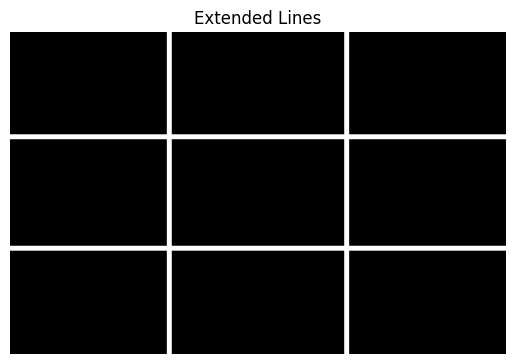

In [11]:

if lines is not None and len(lines)>=4:

    def extend_line(x1, y1, x2, y2, img_shape):

        height, width = img_shape[:2]
        dx = x2 - x1
        dy = y2 - y1

        if dx == 0:
            return [(x1, 0), (x1, height)]
        
        slope = dy / dx
        intercept = y1 - slope * x1

        def get_line_endpoints():
            endpoints = []
            x_top = (0 - intercept) / slope
            if 0 <= x_top < width:
                endpoints.append((int(x_top), 0))

            x_bottom = (height - intercept) / slope
            if 0 <= x_bottom < width:
                endpoints.append((int(x_bottom), height))

            y_left = intercept
            if 0 <= y_left < height:
                endpoints.append((0, int(y_left)))

            y_right = slope * width + intercept
            if 0 <= y_right < height:
                endpoints.append((width, int(y_right)))

            return endpoints

        endpoints = get_line_endpoints()
        if len(endpoints) == 2:
            return endpoints
        else:
            return []

    # Create a new image for the extended lines
    extended_line_image = np.copy(edges) * 0
    extended_lines = []

    # Extend each detected line segment to the image borders
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Correct unpacking for the format
        extended_points = extend_line(x1, y1, x2, y2, edges.shape)
        if len(extended_points) == 2:
            (x1_new, y1_new), (x2_new, y2_new) = extended_points
            extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
            cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

    print("Extended lines:", extended_lines)
    lines_edges = cv2.addWeighted(edges, 0.8, extended_line_image, 1, 0)
    showImage("Extended Lines", extended_line_image, cmap='gray')

    def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):

        # Create a black image
        black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
        
        # Draw each line on the black image
        for (x1, y1), (x2, y2) in lines:
            cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
        
        return black_image
else:
    print("No lines detected.")


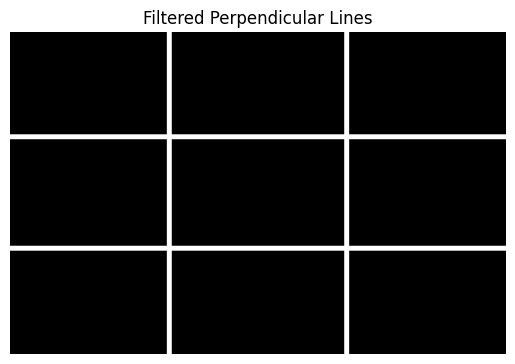

In [12]:
if lines is not None and len(lines)>=4:

    def calculate_angle(line1, line2):

        (x1, y1), (x2, y2) = line1
        (x3, y3), (x4, y4) = line2
        
        # Calculate the slopes
        slope1 = np.arctan2((y2 - y1), (x2 - x1))
        slope2 = np.arctan2((y4 - y3), (x4 - x3))
        
        # Calculate the angle in radians and convert to degrees
        angle = np.abs(np.degrees(slope1 - slope2))
        
        # Normalize the angle to the range [0, 180]
        if angle > 180:
            angle = 360 - angle
        
        return angle

    def is_perpendicular(line1, line2, tolerance=10):

        angle = calculate_angle(line1, line2)
        return 90 - tolerance <= angle <= 90 + tolerance

    def filter_perpendicular_lines(lines, tolerance=10):

        perpendicular_lines = []
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                if is_perpendicular(lines[i], lines[j], tolerance):
                    perpendicular_lines.append(lines[i])
                    perpendicular_lines.append(lines[j])
        
        # Remove duplicates
        perpendicular_lines = list(set(perpendicular_lines))
        return perpendicular_lines

    # Filter lines for perpendicularity
    filtered_lines = filter_perpendicular_lines(extended_lines, tolerance=21)

    # Draw filtered lines on a black background
    filtered_line_image = draw_lines_on_black_image(filtered_lines, edges.shape,(255, 255, 255), 3)
    showImage("Filtered Perpendicular Lines", filtered_line_image)

else:
    print("No lines detected")



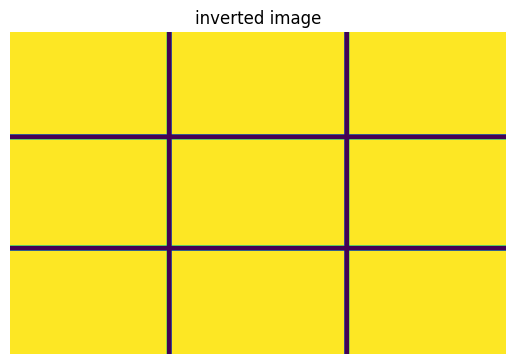

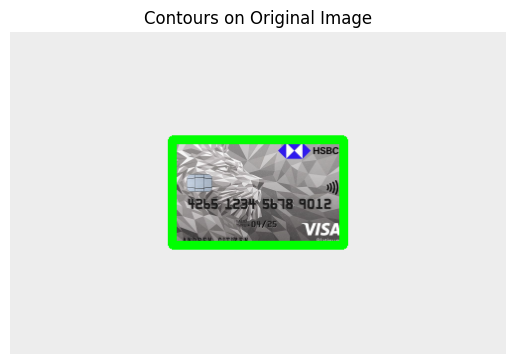

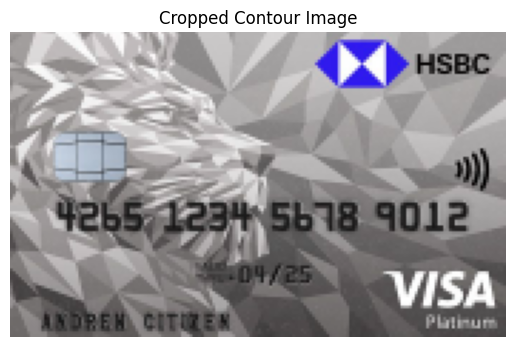

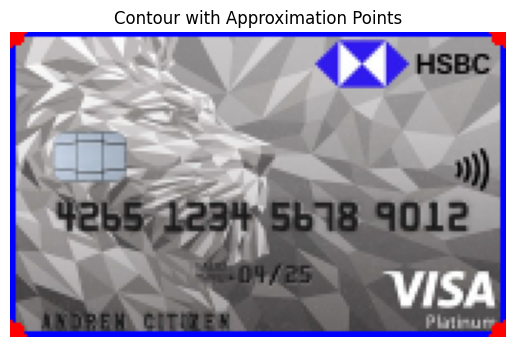

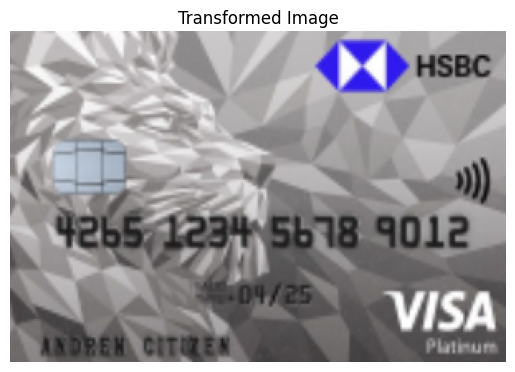

In [13]:
def prepare_image_for_contours(image):

    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    if gray_image.dtype != np.uint8:
        gray_image = cv2.convertScaleAbs(gray_image)

    return gray_image



def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    if len(sorted_contours) > 0:
        return sorted_contours[0]
    else:
        print("No contours found.")
        return None

def draw_contours_on_image(contour, image):
    if contour is not None:
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 7)
        return image_with_contours
    else:
        return image

def crop_contour_from_image(image, contour):
    if contour is not None:
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        result = cv2.bitwise_and(image, image, mask=mask)
        x, y, w, h = cv2.boundingRect(contour)
        cropped_contour_image = result[y:y+h, x:x+w]
        return cropped_contour_image, (x, y, w, h)
    else:
        return image, None

def approximate_and_draw_contour(cropped_image, contour, rect):
    if contour is not None:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) > 0:
            # Adjust approximation points based on the cropping rectangle
            approx = np.array([[pt[0][0] - rect[0], pt[0][1] - rect[1]] for pt in approx])
            
            # Draw the approximated contour on the cropped image
            contour_image = cropped_image.copy()
            cv2.drawContours(contour_image, [approx], -1, (0, 0, 255), 2)  # Red color in BGR
            
            # Draw the points of the approximated contour
            for point in approx:
                cv2.circle(contour_image, tuple(point), 5, (255, 0, 0), -1)  # Blue color in BGR
            
            return contour_image, approx
        else:
            return cropped_image, None
    else:
        return cropped_image, None

def perspective_transform(image, points, dst_size=(300, 200)):
    if len(points) == 4:
        # Ensure points are in the correct order: top-left, top-right, bottom-right, bottom-left
        rect = order_points(points)
        
        # Define the destination points
        width, height = dst_size
        pts2 = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

        # Compute the perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, pts2)

        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(image, matrix, (width, height))
        return transformed_image
    else:
        print("Not enough points for perspective transformation.")
        return image

def order_points(points):
    # Initialize a list of coordinates that will be ordered as:
    # top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype='float32')

    # Sort the points based on their x-coordinates
    x_sorted = points[np.argsort(points[:, 0]), :]

    # Select the left-most and right-most points
    left_most = x_sorted[:2, :]
    right_most = x_sorted[2:, :]

    # Now sort the left-most points based on their y-coordinates to determine the top-left and bottom-left
    left_most = left_most[np.argsort(left_most[:, 1]), :]
    rect[0] = left_most[0]  # top-left
    rect[3] = left_most[1]  # bottom-left

    # Sort the right-most points based on their y-coordinates to determine the top-right and bottom-right
    right_most = right_most[np.argsort(right_most[:, 1]), :]
    rect[1] = right_most[0]  # top-right
    rect[2] = right_most[1]  # bottom-right

    return rect

if lines is not None and len(lines)>=4:
    inverted_imagea = prepare_image_for_contours(cv2.bitwise_not(filtered_line_image))
    showImage("inverted image",inverted_imagea)
    largest_contour = find_contours(inverted_imagea)
else:
    largest_contour = find_contours(dilated_mask)
cropped_contour_image, rect = crop_contour_from_image(padded_imagehq, largest_contour)
contour_with_approx, approx_points = approximate_and_draw_contour(cropped_contour_image, largest_contour, rect)

if approx_points is not None and len(approx_points) >= 4:
    # Ensure we have 4 points for perspective transformation
    pts = np.array(approx_points[:4], dtype='float32')
    transformed_image = perspective_transform(cropped_contour_image, pts)

    # Display results
    showImage("Contours on Original Image", draw_contours_on_image(largest_contour, padded_imagehq))
    showImage("Cropped Contour Image", cropped_contour_image)
    showImage("Contour with Approximation Points", contour_with_approx)
    showImage("Transformed Image", transformed_image)
else:
    print("Insufficient points for perspective transformation.")

Average Brightness: 140.84311666666667
Image is not very light.


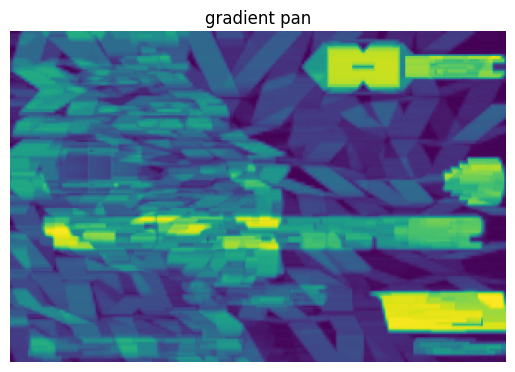

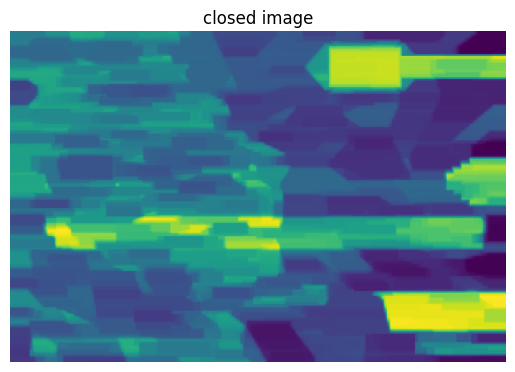

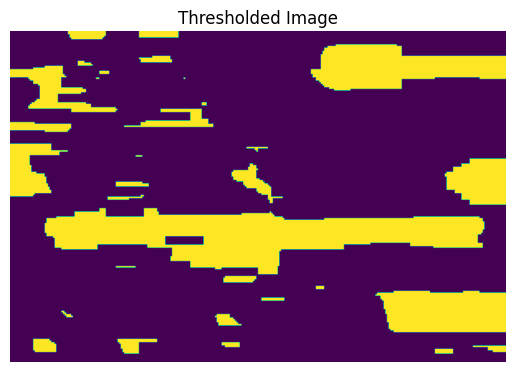

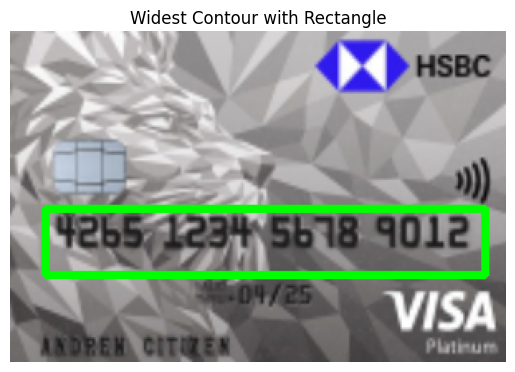

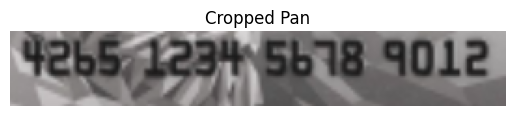

In [14]:
if len(transformed_image.shape)==3:
    gray_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = transformed_image
def check_and_darkened_image(image, threshold=200, darken_factor=2):


    # Calculate average brightness
    average_brightness = np.mean(image)
    print(f'Average Brightness: {average_brightness}')

    # Check if the image is very light
    if average_brightness > threshold:
        print('Image is very light. Darkening it.')
        # Darken the image
        darkened_image = np.clip(image * darken_factor, 0, 255).astype(np.uint8)
        showImage('Darkened Image', darkened_image)
        return darkened_image
    else:
        print('Image is not very light.')
        return image


gray_image = check_and_darkened_image(gray_image)


kernel = np.ones((2, 18), np.uint8) 
gradient = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)
showImage("gradient pan",gradient)
kernelmorph = np.ones((5, 20), np.uint8)

# Perform the morphological close operation
closed_image = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE, kernelmorph)
showImage("closed image",closed_image)
_, thresholded_image = cv2.threshold(closed_image, 95, 255, cv2.THRESH_BINARY)
showImage('Thresholded Image', thresholded_image)
thresholded_image = cv2.convertScaleAbs(thresholded_image)
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store the widest contour
max_width = 0
widest_contour = None
imagepan = transformed_image.copy()
# Loop through each contour
for contour in contours:
    # Get the bounding rectangle for the contour
    x, y, width, height = cv2.boundingRect(contour)
    
    # Check if this is the widest contour
    if width > max_width:
        max_width = width
        widest_contour = contour
        x_widest, y_widest, w_widest, h_widest = x, y, width, height

# Draw the bounding rectangle around the widest contour on the image
if widest_contour is not None:
    cv2.rectangle(imagepan, (x_widest, y_widest), (x_widest + w_widest, y_widest + h_widest), (0, 255, 0), 3)

    # Crop the widest contour area from the image
    cropped_image = transformed_image[y_widest:y_widest + h_widest, x_widest:x_widest + w_widest]
    showImage('Widest Contour with Rectangle', imagepan)
    showImage('Cropped Pan', cropped_image)


resizedpan=resize_image(cropped_image,900)



